In [1]:
#load data
from keras.datasets import imdb

max_features=10000

print('Loading Data...')
(train_data, train_labels),(test_data, test_labels)=imdb.load_data(num_words=max_features)
print(len(train_data),'train sequences')
print(len(test_data),'test sequences')

Using TensorFlow backend.


Loading Data...
25000 train sequences
25000 test sequences


In [2]:
#check the maximum word index <=10000
max([max(sequence) for sequence in train_data])

9999

In [3]:
#pad sequence to equal size (cut off after 500 length)
from keras.preprocessing import sequence

maxlen=500

print ('Pad sequence (samples x time)')
x_train=sequence.pad_sequences(train_data,maxlen=maxlen)
x_test=sequence.pad_sequences(test_data,maxlen=maxlen)
print('input_train shape:',x_train.shape)
print('input_test shape:',x_test.shape)

Pad sequence (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
y_train = train_labels
y_test = test_labels

In [5]:
#simpleRNN architeceture
from keras.layers import Dense,Embedding,SimpleRNN
from keras.models import Sequential

model_rnn=Sequential()
model_rnn.add(Embedding(max_features,128,input_length=maxlen))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1,activation='sigmoid'))

model_rnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                5152      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,285,185
Trainable params: 1,285,185
Non-trainable params: 0
_________________________________________________________________


In [6]:
#simpleRNN fit
history_rnn=model_rnn.fit(x_train,y_train,
                 epochs=20,
                 batch_size=128,
                 validation_split=0.2)

F:\Pro_base\Anaconda\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 47s 2ms/step - loss: 0.6390 - acc: 0.6306 - val_loss: 0.4966 - val_acc: 0.7690
Epoch 2/20
20000/20000 [==============================] - 47s 2ms/step - loss: 0.3652 - acc: 0.8450 - val_loss: 0.4264 - val_acc: 0.8076
Epoch 3/20
20000/20000 [==============================] - 49s 2ms/step - loss: 0.2145 - acc: 0.9201 - val_loss: 0.3645 - val_acc: 0.8496
Epoch 4/20
20000/20000 [==============================] - 48s 2ms/step - loss: 0.1108 - acc: 0.9655 - val_loss: 0.4371 - val_acc: 0.8300
Epoch 5/20
20000/20000 [==============================] - 49s 2ms/step - loss: 0.0465 - acc: 0.9894 - val_loss: 0.5285 - val_acc: 0.8060
Epoch 6/20
20000/20000 [==============================] - 49s 2ms/step - loss: 0.0237 - acc: 0.9958 - val_loss: 0.5657 - val_acc: 0.8292
Epoch 7/20
20000/20000 [==============================] - 49s 2ms/step - loss: 0.0155 - acc: 0.9976 - val_loss: 0.5685 - val_acc:

In [7]:
#check the results of model fitting
history_dict=history_rnn.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

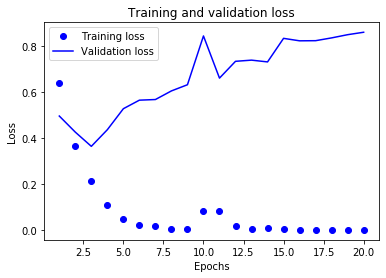

In [8]:
#plot training and test loss
import matplotlib.pyplot as plt

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

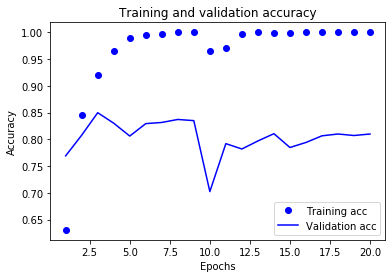

In [9]:
#plot train and validation accuracy
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [10]:
#prediction on test set
prediction_test=model_rnn.predict(x_test)
prediction_test

array([[0.9828361 ],
       [0.99989307],
       [0.484652  ],
       ...,
       [0.00397086],
       [0.9691417 ],
       [0.9962096 ]], dtype=float32)

In [11]:
#evaluate model on test set
results=model_rnn.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 31s 1ms/step


[0.862665967206955, 0.813759982585907]

In [12]:
#simpleRNN fit after tuning
history_rnn_tune=model_rnn.fit(x_train,y_train,
                 epochs=5,
                 batch_size=128)

Epoch 1/5
25000/25000 [==============================] - 54s 2ms/step - loss: 0.2593 - acc: 0.9098
Epoch 2/5
25000/25000 [==============================] - 55s 2ms/step - loss: 0.0819 - acc: 0.9733
Epoch 3/5
25000/25000 [==============================] - 54s 2ms/step - loss: 0.0220 - acc: 0.9947
Epoch 4/5
25000/25000 [==============================] - 59s 2ms/step - loss: 0.0066 - acc: 0.9992
Epoch 5/5
25000/25000 [==============================] - 57s 2ms/step - loss: 0.0024 - acc: 0.9999


In [13]:
#prediction on test set
prediction_test_tune=model_rnn.predict(x_test)
prediction_test_tune

array([[0.99446446],
       [0.99966466],
       [0.1389587 ],
       ...,
       [0.22017577],
       [0.13451743],
       [0.77437353]], dtype=float32)

In [14]:
#evaluate model on test set
results_tune=model_rnn.evaluate(x_test,y_test)
results_tune

25000/25000 [==============================] - 30s 1ms/step


[0.7903892033958435, 0.8043599724769592]

In [15]:
#LSTM archetecture without dropout
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM

model_lstm=Sequential()
model_lstm.add(Embedding(max_features,128,input_length=maxlen))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1,activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,300,641
Trainable params: 1,300,641
Non-trainable params: 0
_________________________________________________________________


In [16]:
#LSTM model fit
history_lstm=model_lstm.fit(x_train,y_train,
                            batch_size=128,
                            epochs=20,
                            validation_split=0.2)

F:\Pro_base\Anaconda\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 102s 5ms/step - loss: 0.5136 - acc: 0.7505 - val_loss: 0.3707 - val_acc: 0.8418
Epoch 2/20
20000/20000 [==============================] - 101s 5ms/step - loss: 0.3355 - acc: 0.8598 - val_loss: 0.4358 - val_acc: 0.7970
Epoch 3/20
20000/20000 [==============================] - 102s 5ms/step - loss: 0.2327 - acc: 0.9103 - val_loss: 0.3221 - val_acc: 0.8684
Epoch 4/20
20000/20000 [==============================] - 104s 5ms/step - loss: 0.1604 - acc: 0.9434 - val_loss: 0.3435 - val_acc: 0.8654
Epoch 5/20
20000/20000 [==============================] - 105s 5ms/step - loss: 0.1133 - acc: 0.9635 - val_loss: 0.3779 - val_acc: 0.8674
Epoch 6/20
20000/20000 [==============================] - 107s 5ms/step - loss: 0.0920 - acc: 0.9697 - val_loss: 0.4245 - val_acc: 0.8512
Epoch 7/20
20000/20000 [==============================] - 107s 5ms/step - loss: 0.0919 - acc: 0.9704 - val_loss: 0.4276 - v

In [17]:
#check the results of model fitting
history_dict=history_lstm.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

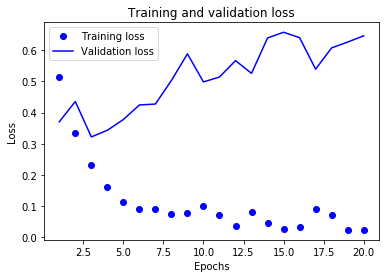

In [18]:
#plot training and test loss
import matplotlib.pyplot as plt

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

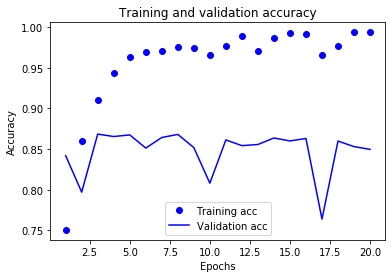

In [19]:
#plot train and validation accuracy
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:
#prediction on test set
prediction_test=model_lstm.predict(x_test)
prediction_test

array([[1.0350049e-03],
       [9.9999499e-01],
       [9.7424209e-01],
       ...,
       [8.3310835e-05],
       [6.8289965e-02],
       [4.0686774e-01]], dtype=float32)

In [21]:
#evaluate model on test set
results=model_lstm.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 65s 3ms/step


[0.6779569334459304, 0.8418400287628174]

In [22]:
#LSTM archetecture
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM

model_lstm_1=Sequential()
model_lstm_1.add(Embedding(max_features,128,input_length=maxlen))
model_lstm_1.add(LSTM(32,dropout=0.2))
model_lstm_1.add(Dense(1,activation='sigmoid'))
model_lstm_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model_lstm_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,300,641
Trainable params: 1,300,641
Non-trainable params: 0
_________________________________________________________________


In [23]:
#LSTM model fit
history_lstm_1=model_lstm_1.fit(x_train,y_train,
                            batch_size=128,
                            epochs=20,
                            validation_split=0.2)

F:\Pro_base\Anaconda\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 99s 5ms/step - loss: 0.4674 - acc: 0.7729 - val_loss: 0.3161 - val_acc: 0.8694
Epoch 2/20
20000/20000 [==============================] - 100s 5ms/step - loss: 0.2506 - acc: 0.9022 - val_loss: 0.3004 - val_acc: 0.8790
Epoch 3/20
20000/20000 [==============================] - 109s 5ms/step - loss: 0.1681 - acc: 0.9406 - val_loss: 0.3365 - val_acc: 0.8686
Epoch 4/20
20000/20000 [==============================] - 120s 6ms/step - loss: 0.1307 - acc: 0.9552 - val_loss: 0.3692 - val_acc: 0.8744
Epoch 5/20
20000/20000 [==============================] - 119s 6ms/step - loss: 0.0983 - acc: 0.9675 - val_loss: 0.3637 - val_acc: 0.8770
Epoch 6/20
20000/20000 [==============================] - 121s 6ms/step - loss: 0.0705 - acc: 0.9785 - val_loss: 0.4230 - val_acc: 0.8734
Epoch 7/20
20000/20000 [==============================] - 115s 6ms/step - loss: 0.1253 - acc: 0.9545 - val_loss: 0.4442 - va

In [24]:
#check the results of model fitting
history_dict=history_lstm_1.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

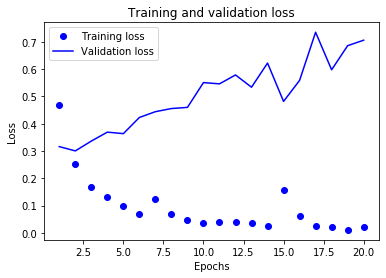

In [25]:
#plot training and test loss
import matplotlib.pyplot as plt

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

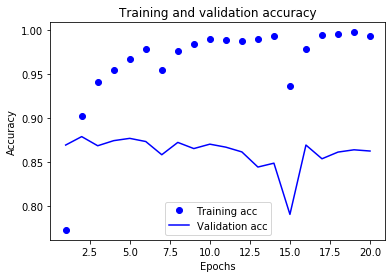

In [26]:
#plot train and validation accuracy
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
#prediction on test set
prediction_test=model_lstm_1.predict(x_test)
prediction_test

array([[1.51329935e-02],
       [9.99998033e-01],
       [1.07885152e-01],
       ...,
       [1.57514442e-05],
       [3.84658307e-01],
       [1.55341625e-02]], dtype=float32)

In [28]:
#evaluate model on test set
results=model_lstm_1.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 89s 4ms/step


[0.7464985823944211, 0.8525999784469604]

In [32]:
#LSTM model fit after tuning
history_lstm_tune=model_lstm_1.fit(x_train,y_train,
                            batch_size=128,
                            epochs=10,
                            validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 105s 5ms/step - loss: 0.0156 - acc: 0.9960 - val_loss: 0.8746 - val_acc: 0.8508
Epoch 2/10
20000/20000 [==============================] - 130s 7ms/step - loss: 0.0108 - acc: 0.9973 - val_loss: 0.7664 - val_acc: 0.8630
Epoch 3/10
20000/20000 [==============================] - 135s 7ms/step - loss: 0.0048 - acc: 0.9991 - val_loss: 0.8316 - val_acc: 0.8648
Epoch 4/10
20000/20000 [==============================] - 136s 7ms/step - loss: 0.0038 - acc: 0.9993 - val_loss: 0.8292 - val_acc: 0.8532
Epoch 5/10
20000/20000 [==============================] - 115s 6ms/step - loss: 0.0055 - acc: 0.9988 - val_loss: 0.8254 - val_acc: 0.8608
Epoch 6/10
20000/20000 [==============================] - 117s 6ms/step - loss: 0.0045 - acc: 0.9994 - val_loss: 0.8398 - val_acc: 0.8552
Epoch 7/10
20000/20000 [==============================] - 119s 6ms/step - loss: 0.0104 - acc: 0.9977 - val_loss: 0.7601 - v

In [33]:
#prediction on test set
prediction_test_tune=model_lstm_1.predict(x_test)
prediction_test_tune

array([[3.3081853e-01],
       [9.9999976e-01],
       [6.4991117e-01],
       ...,
       [4.7106842e-06],
       [7.2517963e-05],
       [8.3678478e-01]], dtype=float32)

In [34]:
#evaluate model on test set
results=model_lstm_1.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 68s 3ms/step


[0.8074933442556858, 0.8386399745941162]